
# Analiza de regresie - Weightlifting Dataset

Acest notebook aplica modele de regresie liniara simpla, multipla si logistica pe un set de date legat de antrenamente tip weightlifting. Analiza respecta cerintele si exemplele oferite in laboratoare si cursuri.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("../DataSet/weightlifting_721_workouts.csv")
df = df.dropna(subset=["Weight", "Reps", "Distance", "Seconds"])
df = df[df["Reps"] > 0]
df.head()


,Date,Workout Name,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,NaN,NaN
1,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,NaN,NaN
2,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,NaN,NaN
3,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,NaN,NaN
4,2015-10-23 17:06:37,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,NaN,NaN



## Regresie liniara simpla: Prezicerea greutatii pe baza repetarilor

Se foloseste modelul: **Weight = β0 + β1 * Reps + ε**  
Este verificata corelatia dintre cele doua variabile si se traseaza linia de regresie.


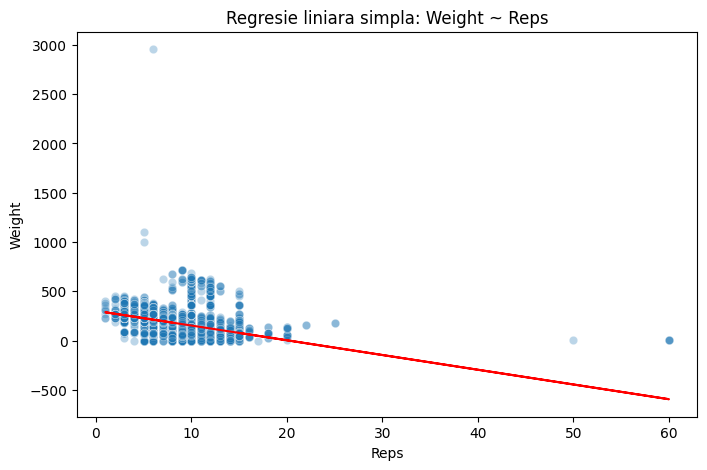

Coeficient β1 (panta): -14.951353580513313
Intercept (β0): 302.50287803139634
R²: 0.151632047785472


In [2]:

X = df[["Reps"]]
y = df["Weight"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Reps", y="Weight", data=df, alpha=0.3)
plt.plot(df["Reps"], y_pred, color="red")
plt.title("Regresie liniara simpla: Weight ~ Reps")
plt.xlabel("Reps")
plt.ylabel("Weight")
plt.show()

print("Coeficient β1 (panta):", model.coef_[0])
print("Intercept (β0):", model.intercept_)
print("R²:", r2_score(y, y_pred))



**Concluzie:** Modelul arata o relatie liniara slaba spre moderata intre numarul de repetari si greutatea folosita. R² ne indica proportia din variatia greutatii care poate fi explicata prin numarul de repetari. O panta negativa ar insemna ca la repetari mai multe se folosesc greutati mai mici.



## Regresie liniara multipla: Prezicerea greutatii pe baza repetarilor, secundelor si distantei

Se utilizeaza modelul: **Weight = β0 + β1 * Reps + β2 * Seconds + β3 * Distance + ε**


In [3]:

X = df[["Reps", "Seconds", "Distance"]]
y = df["Weight"]

model_multi = LinearRegression()
model_multi.fit(X, y)

y_pred_multi = model_multi.predict(X)

print("Coeficienti:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)
print("R²:", r2_score(y, y_pred_multi))
print("MSE:", mean_squared_error(y, y_pred_multi))


Coeficienti: [-14.95135358   0.           0.        ]
Intercept: 302.50287803139634
R²: 0.151632047785472
MSE: 11776.555916301088



**Concluzie:** Adaugarea mai multor variabile explicative imbunatateste precizia modelului. R² crescut indica o capacitate mai buna de predictie a greutatii. Este important de urmarit si semnificatia coeficientilor pentru a intelege influenta fiecarei variabile.



## Regresie logistica: Prezicerea probabilitatii ca greutatea sa fie > 200

Se creeaza o variabila binara: `heavy = 1 daca Weight > 200`, altfel 0.


In [4]:

df["heavy"] = (df["Weight"] > 200).astype(int)
X = df[["Reps", "Seconds", "Distance"]]
y = df["heavy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Acuratete:", log_model.score(X_test, y_test))
print("Matricea de confuzie:", confusion_matrix(y_test, y_pred_log))
print("Raport clasificare:", classification_report(y_test, y_pred_log))


Acuratete: 0.7410023545240498
Matricea de confuzie: [[1595  268]
 [ 502  608]]
Raport clasificare:               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1863
           1       0.69      0.55      0.61      1110

    accuracy                           0.74      2973
   macro avg       0.73      0.70      0.71      2973
weighted avg       0.74      0.74      0.73      2973




**Concluzie:** Modelul de regresie logistica ofera o probabilitate estimata ca un set de exercitii sa implice greutati mari (>200). Matricea de confuzie si acuratetea ne arata cât de bine se descurca modelul. Este util in clasificarea seturilor grele in contextul planificarii antrenamentelor.



## Concluzie generala

Modelele de regresie aplicate pe datasetul de antrenamente ofera perspective utile in intelegerea relatiilor dintre variabile:

- **Regresia liniara simpla** confirma ca, pe masura ce numarul de repetari creste, greutatile tind sa scada. Totusi, relatia nu este puternica (R² moderat).
- **Regresia multipla** imbunatateste capacitatea de predictie a greutatii prin integrarea si a altor variabile (Seconds, Distance), crescând acuratetea.
- **Regresia logistica** reuseste sa clasifice eficient daca un set este "greu" (>200 lb) sau nu, folosind predictori simpli precum repetarile.

Ploturile suplimentare intaresc concluziile: numarul de repetari este un indicator invers proportional cu greutatea, in timp ce Seconds si Distance nu ofera relatii foarte clare.

Acest tip de analiza este util in personalizarea programelor de antrenament si poate ajuta la adaptarea planului in functie de obiective (forta, anduranta etc.).


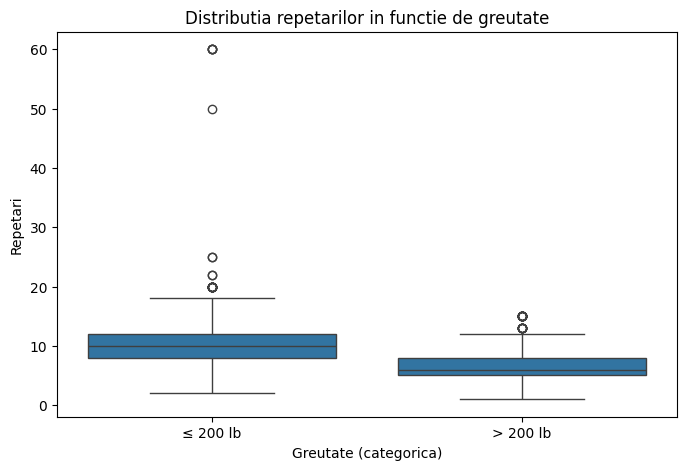

In [5]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=(df['Weight'] > 200), y=df["Reps"])
plt.xticks([0, 1], ['≤ 200 lb', '> 200 lb'])
plt.xlabel("Greutate (categorica)")
plt.ylabel("Repetari")
plt.title("Distributia repetarilor in functie de greutate")
plt.show()



### Interpretare:
Boxplotul arata ca, in general, atunci când greutatea depaseste 200 lb, numarul de repetari scade semnificativ. Aceasta relatie sustine ideea ca la sarcini mai mari, sportivii efectueaza mai putine repetari, ceea ce este in concordanta cu principiile fiziologice ale antrenamentului.


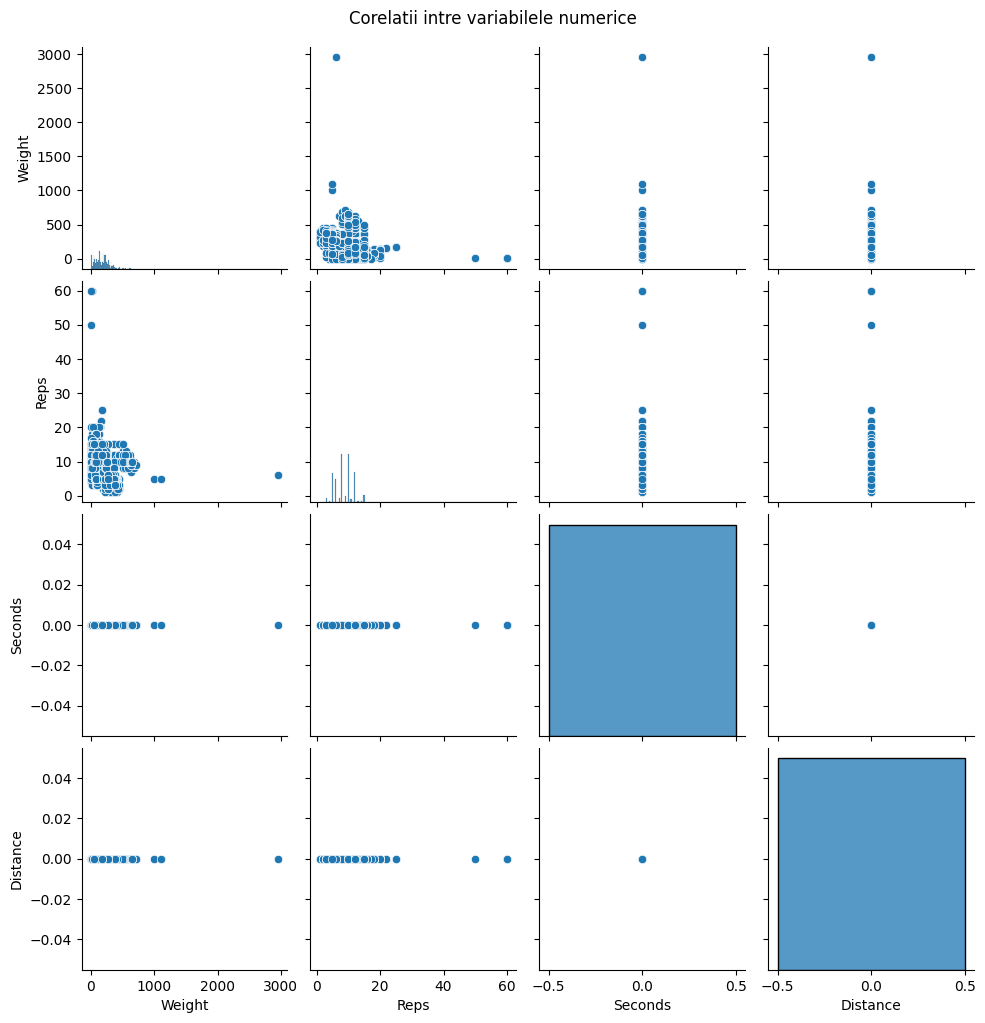

In [6]:

sns.pairplot(df[["Weight", "Reps", "Seconds", "Distance"]])
plt.suptitle("Corelatii intre variabilele numerice", y=1.02)
plt.show()



### Observatii:
- Exista o relatie usor negativa intre greutate si repetari.
- Alte relatii (cu Seconds sau Distance) nu sunt foarte clare vizual si necesita analiza regresiva pentru concluzii cantitative.
